<a href="https://colab.research.google.com/github/Bayaniblues/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_Unit_1_Sprint_2_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in Unit 1 Sprint 2. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

## Questions

When completing this section, try to limit your answers to 2-3 sentences max and use plain english as much as possible. It's very easy to hide incomplete knowledge and undertanding behind fancy or technical words, so imagine you are explaining these things to a non-technical interviewer.

1. What is a CSV and how do you load it into a notebook?

```
CSV stands for Comma Seperated Values and are used to analyze datasets with python, excel, and more. 

pd.read_CSV

```

2. What is a NaN and what will you do with it?

```
NaN stands for Not a Number, it is something we could skip over when doing ttests. I will need to look up if they are usefull in anyway. placeholder.
```

3. How do you check for datatypes?

```
df.dtypes is the method that finds datatypes.


```

4. What is Crosstabs and what are they used for?

```
A crosstab is the type of data product derived from CSV files. Ment to easily organize large sets of data. Shows relationshiops.
```
5. What is the difference between a T-Test and a P-Test?

```
A Ttest consist of a null Hypothesis, Alternative Hypotheisis, confidence value, p-value, and our conclusion. finds the relationship between populations and samples.

the p value is the probablitiy of the null hypothosis being True. 

```

### what to study. Use this section as a reasearch guide. There is nothing to answer here only keywords to help you seach for things and get you familiar with what to look for when researching. 


Crosstab
```
pandas crosstab
```
CSV
```
Comma seperated values, pandas, read_csv
```
T-Tests
```
ttest python. scikit
```
Datatypes
```
Datatype pandas
```
Plots
```
plotly
```
Analysis and Interpretation
```
Storytelling datascience


## Practice Problems

Load and validate a data set


In [8]:
import numpy as np
import pandas as pd
Data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

headers = ['Class-Name',
           'Handicapped-infants',
           'Water-project-cost-sharing',
           'Adoption-of-budget-resolution',
           'Physician-fee-freeze',
           'El-savador-aid',
           'Religious-groups-in-schools',
           'Anti-satellite-test-ban',
           'Aid-to-nicaraguan-contras',
           'Mx-missle',
           'Immigration',
           'Synfuels-corporation-cutback',
           'Education-spending',
           'Superfund-right-to-sue',
           'Crime',
           'Duty-free-exports',
           'Export-administration-act-south-africa'
           ]

df = pd.read_csv(Data_url, names=headers)

df

,Class-Name,Handicapped-infants,Water-project-cost-sharing,Adoption-of-budget-resolution,Physician-fee-freeze,El-savador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,Mx-missle,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


Check for NaNs


In [0]:
df.isnull().sum()

In [13]:
df = df.replace({'y': 1, 'n': 0, "?": np.NaN})
df

,Class-Name,Handicapped-infants,Water-project-cost-sharing,Adoption-of-budget-resolution,Physician-fee-freeze,El-savador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,Mx-missle,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


Check for Dtypes

In [14]:
df.dtypes

Class-Name                                 object
Handicapped-infants                       float64
Water-project-cost-sharing                float64
Adoption-of-budget-resolution             float64
Physician-fee-freeze                      float64
El-savador-aid                            float64
Religious-groups-in-schools               float64
Anti-satellite-test-ban                   float64
Aid-to-nicaraguan-contras                 float64
Mx-missle                                 float64
Immigration                               float64
Synfuels-corporation-cutback              float64
Education-spending                        float64
Superfund-right-to-sue                    float64
Crime                                     float64
Duty-free-exports                         float64
Export-administration-act-south-africa    float64
dtype: object

create plots for explanitory visualizations

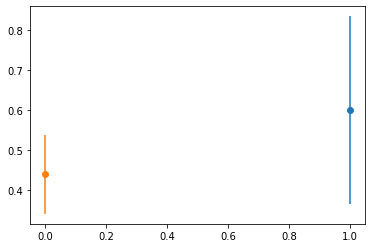

In [18]:
from scipy import stats


import pandas as pd
import matplotlib.pyplot as plt

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)



## comparing multiple confidence intervals
coinflips1 = np.random.binomial(n=1, p=.5, size=100)
coinflips2 = np.random.binomial(n=1, p=.5, size=20)

lower1, mean1, upper1 = confidence_interval(coinflips1)
lower2, mean2, upper2 = confidence_interval(coinflips2)

moe1 = upper1 - mean1
moe2 = upper2 - mean2

plt.errorbar(1, mean2, yerr=moe2, fmt='o')
plt.errorbar(0, mean1, yerr=moe1, fmt='o')
plt.show()



Create a crosstab

In [21]:
rep = df[df['Class-Name'] == 'republican']
rep.head()

,Class-Name,Handicapped-infants,Water-project-cost-sharing,Adoption-of-budget-resolution,Physician-fee-freeze,El-savador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,Mx-missle,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


Do Ttests on the data

In [24]:
rep_votes = rep['Immigration'].dropna()
stats.ttest_1samp(rep_votes, .2)

Ttest_1sampResult(statistic=9.219738258523824, pvalue=1.4147112274226787e-16)